<a href="https://colab.research.google.com/github/Econ-Yonsei/Time-series/blob/master/Ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
install.packages('forecast')
install.packages("tseries") 
library(forecast) 
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Let's extract the data from colab (R)


In [ ]:
data<-read.csv("/content/kingage.csv") #Observations = 42, Source:"http://robjhyndman.com/tsdldata/misc/kings.dat"

In [ ]:
head(data)

,age
,<int>
1,60
2,43
3,67
4,50
5,56
6,42


 Define the data type(type series).

 And make the time plot. Let me check the systematic components(Trend component, Seasonal component, Cyclical component). 

 In general, check the trend component and the seasonal component. (Cyclical comonent is difficult to find).


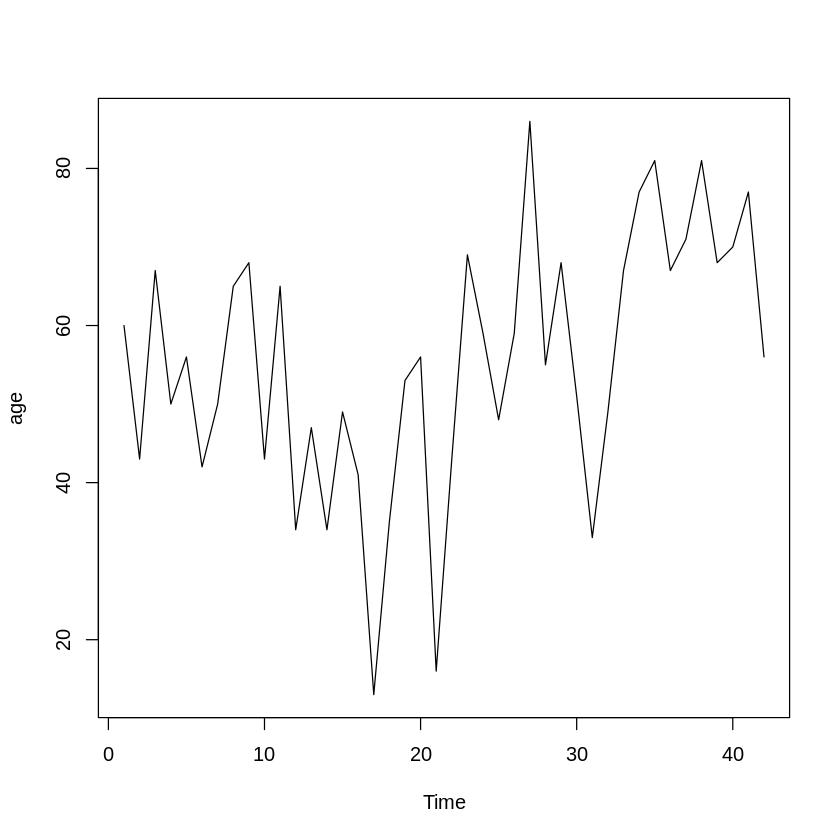

In [24]:
king.ts<-ts(data)
plot.ts(king.ts)

As you see the plot, there is a trend component. So the data is nonstationary. If you want to use Box-Jenkins models, then we should consider differencing because of the stationary of data.

How about Variance of the data? Do I have to trim it? Think about it. 

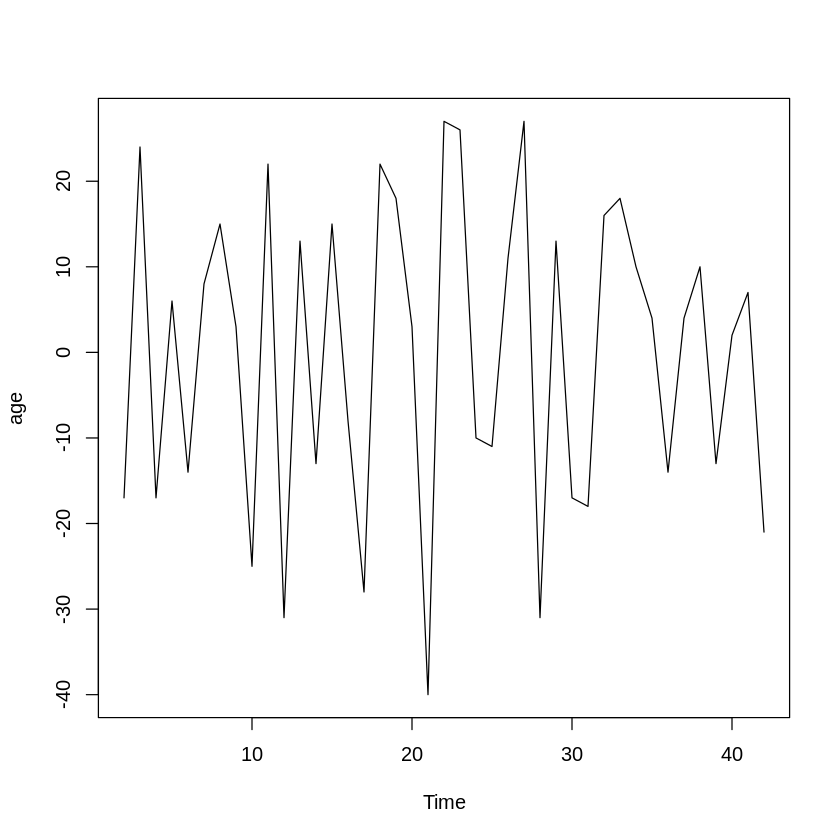

In [25]:
king.ff1<-diff(king.ts, differences=1)
plot.ts(king.ff1)


By differencing, we can find that the trend component is eliminated. Now, we might use the Box-Jenkins models. 
But if you want to check whether the data is stationary, then find the Unit Root test.(ADF test, PP test, KPSS test....etc).

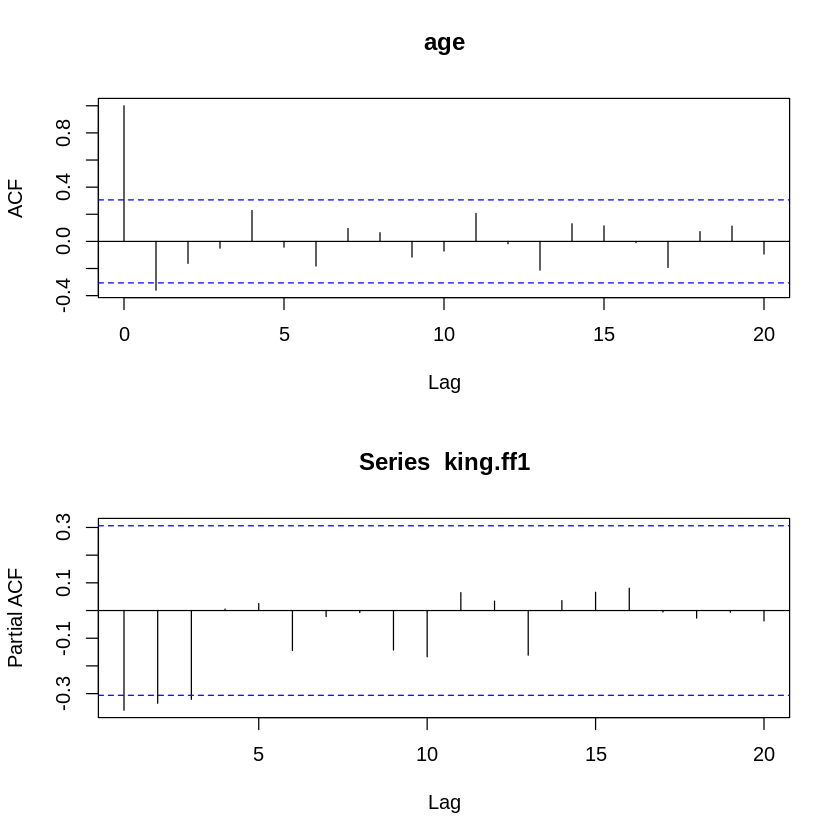

In [26]:
par(mfrow=c(2,1))
acf(king.ff1, lag.max = 20)
pacf(king.ff1, lag.max = 20)

Considering ACF and PACF, we can select three models.

{MA(1),MA(2),AR(1),AR(2),AR(3),ARMA....Maybe you can select more.} 

In [27]:
kings_AR1<-arima(king.ts, order=c(1,1,0))
kings_AR2<-arima(king.ts, order=c(2,1,0))
kings_AR3<-arima(king.ts, order=c(3,1,0))
kings_MA1<-arima(king.ts, order=c(0,1,1))
kings_MA2<-arima(king.ts, order=c(0,1,2))
kings_ARIMA<-arima(king.ts, order=c(1,1,1))

Estimation for selected models.

In [28]:
kings_AR1
kings_AR2
kings_AR3
kings_MA1
kings_MA2
kings_ARIMA


Call:
arima(x = king.ts, order = c(1, 1, 0))

Coefficients:
          ar1
      -0.3713
s.e.   0.1468

sigma^2 estimated as 283.5:  log likelihood = -174.02,  aic = 352.04


Call:
arima(x = king.ts, order = c(2, 1, 0))

Coefficients:
          ar1      ar2
      -0.4893  -0.3399
s.e.   0.1481   0.1484

sigma^2 estimated as 250.3:  log likelihood = -171.59,  aic = 349.17


Call:
arima(x = king.ts, order = c(3, 1, 0))

Coefficients:
          ar1      ar2      ar3
      -0.6063  -0.4904  -0.3284
s.e.   0.1489   0.1551   0.1477

sigma^2 estimated as 222:  log likelihood = -169.3,  aic = 346.59


Call:
arima(x = king.ts, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 estimated as 230.4:  log likelihood = -170.06,  aic = 344.13


Call:
arima(x = king.ts, order = c(0, 1, 2))

Coefficients:
          ma1      ma2
      -0.6325  -0.1209
s.e.   0.1637   0.1666

sigma^2 estimated as 227.5:  log likelihood = -169.81,  aic = 345.63


Call:
arima(x = king.ts, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.1347  -0.7860
s.e.  0.2166   0.1398

sigma^2 estimated as 228.1:  log likelihood = -169.87,  aic = 345.74

According to results, MA(1) is the best model because of the lowest aic.

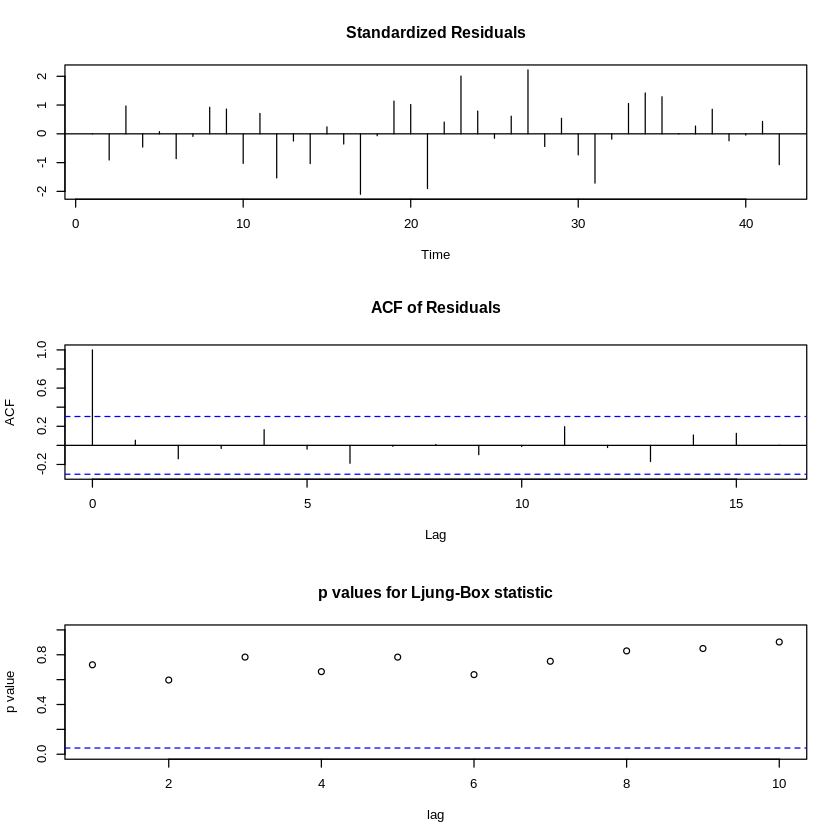

In [29]:
tsdiag(kings_MA1)

It is diagonstic tests for the model.

   Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
43       67.75063 48.29647 87.20479 37.99806  97.50319
44       67.75063 47.55748 87.94377 36.86788  98.63338
45       67.75063 46.84460 88.65665 35.77762  99.72363
46       67.75063 46.15524 89.34601 34.72333 100.77792
47       67.75063 45.48722 90.01404 33.70168 101.79958
48       67.75063 44.83866 90.66260 32.70979 102.79146
49       67.75063 44.20796 91.29330 31.74523 103.75603
50       67.75063 43.59372 91.90753 30.80583 104.69543
51       67.75063 42.99472 92.50653 29.88974 105.61152
52       67.75063 42.40988 93.09138 28.99529 106.50596

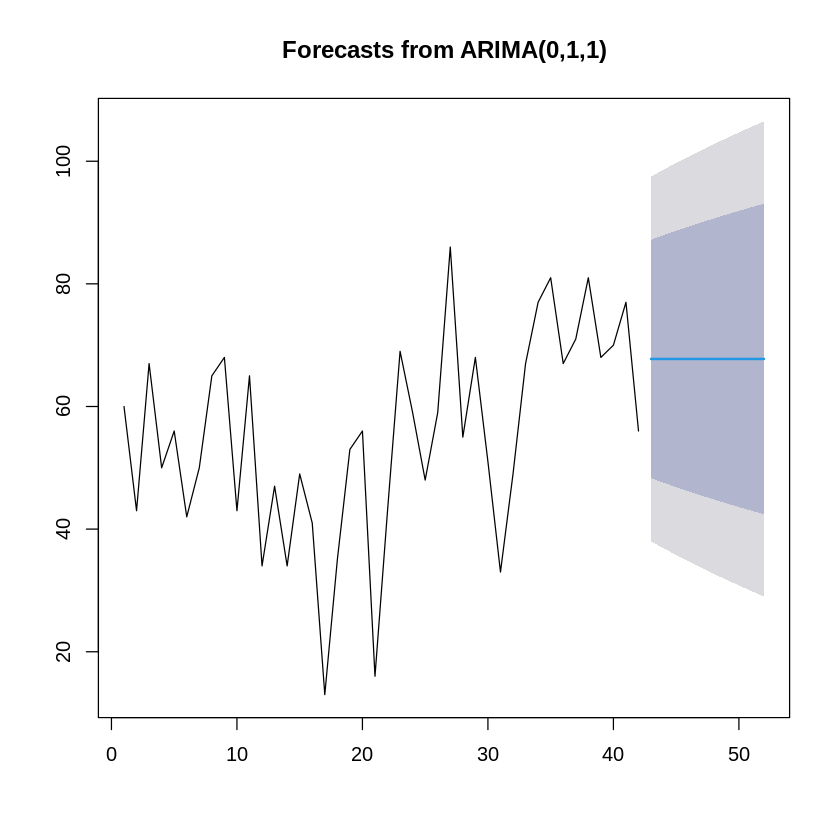

In [31]:
king.forecasts<-forecast(kings_MA1, h=10)
king.forecasts
plot(king.forecasts)

The result of foercasting.